Using saas.csv or log data from API usage:
1. Split data (train/test) and resample by any period, except daily, and aggreage using the sum

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import itertools as it

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics

import math

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('saas.csv')

In [3]:
df.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
Month_Invoiced       790458 non-null object
Customer_Id          790458 non-null int64
Invoice_Id           790458 non-null int64
Subscription_Type    790458 non-null float64
Amount               790458 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 30.2+ MB


In [5]:
df['Month_Invoiced'] = pd.to_datetime(df.Month_Invoiced)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
Month_Invoiced       790458 non-null datetime64[ns]
Customer_Id          790458 non-null int64
Invoice_Id           790458 non-null int64
Subscription_Type    790458 non-null float64
Amount               790458 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 30.2 MB


In [7]:
df.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [8]:
df.Month_Invoiced.value_counts()

2014-01-31    20000
2014-02-28    19800
2014-03-31    19599
2014-04-30    19413
2014-05-31    19221
2014-06-30    19038
2014-07-31    18851
2014-08-31    18672
2014-09-30    18494
2014-10-31    18313
2014-11-30    18145
2014-12-31    17996
2015-01-31    17829
2015-02-28    17680
2015-03-31    17530
2015-04-30    17376
2015-05-31    17225
2015-06-30    17089
2015-07-31    16951
2015-08-31    16817
2015-09-30    16671
2015-10-31    16529
2015-11-30    16387
2015-12-31    16268
2016-01-31    16142
2016-02-29    16019
2016-03-31    15895
2016-04-30    15777
2016-05-31    15685
2016-06-30    15571
2016-07-31    15460
2016-08-31    15355
2016-09-30    15240
2016-10-31    15144
2016-11-30    15049
2016-12-31    14938
2017-01-31    14840
2017-02-28    14741
2017-03-31    14665
2017-04-30    14576
2017-05-31    14475
2017-06-30    14400
2017-07-31    14312
2017-08-31    14209
2017-09-30    14131
2017-10-31    14041
2017-11-30    13985
2017-12-31    13914
Name: Month_Invoiced, dtype: int64

In [9]:
df_date = df.sort_values(by='Month_Invoiced').set_index('Month_Invoiced').resample('M').sum()

In [10]:
df_date

,Customer_Id,Invoice_Id,Subscription_Type,Amount
Month_Invoiced,,,,
2014-01-31,20199990000,100199990000,7170.0,35850.0
2014-02-28,20000052061,99592010100,7438.0,37190.0
2014-03-31,19799172212,98967090801,7659.0,38295.0
2014-04-30,19613251862,98406535365,7851.0,39255.0
2014-05-31,19421255289,97804559262,8071.0,40355.0
2014-06-30,19238538842,97237565457,8251.0,41255.0
2014-07-31,19051670683,96639576096,8434.0,42170.0
2014-08-31,18873025377,96072248040,8642.0,43210.0
2014-09-30,18695106282,95500066207,8815.0,44075.0


In [11]:
# Goint to count 'Subscription_Type' as number of subscriptions an account has.
# Will prove this by showing that each subscription is worth $5.00. Mutliply 'Subscription_Type'*5 to get the 'Amount'.
(df['Subscription_Type']*5 == df['Amount']).all()

True

In [12]:
df_date = df_date[['Subscription_Type','Amount']]
df_date

,Subscription_Type,Amount
Month_Invoiced,,
2014-01-31,7170.0,35850.0
2014-02-28,7438.0,37190.0
2014-03-31,7659.0,38295.0
2014-04-30,7851.0,39255.0
2014-05-31,8071.0,40355.0
2014-06-30,8251.0,41255.0
2014-07-31,8434.0,42170.0
2014-08-31,8642.0,43210.0
2014-09-30,8815.0,44075.0


Split the data into train and test using a proportion split, where the first 66% of the available data, (sorted by date), is assigned to train and the remaining, to test.

In [13]:
train_size = int(len(df_date)*.80)
train_size

38

In [14]:
train = df_date[0:train_size]
train.shape

(38, 2)

In [15]:
test = df_date[train_size:len(df_date)]
test.shape

(10, 2)

In [16]:
print('Observations: %d' % len(df_date))
print('Training Observations: %d' % len(train))
print('Testing Observations: %d' % len(test))

Observations: 48
Training Observations: 38
Testing Observations: 10


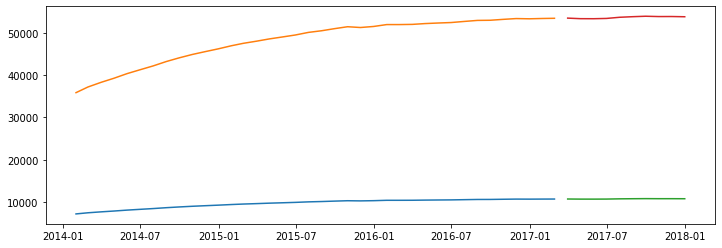

In [17]:
plt.figure(figsize=(12,4))
plt.plot(train)
plt.plot(test)
plt.show()

Before we try out different methods for forecasting amount of subscriptions per month, and amount paid, let's create a couple of function that will be helpful in evaluating each of the methods that follow.

`evaluate()` will compute the Mean Squared Error and the Root Mean Squared Error to evaluate.

In [18]:
def evaluate(target_var, train=train, test=test, output=True):
    mse = metrics.mean_squared_error(test[target_var], yhat[target_var])
    rmse = math.sqrt(mse)
    
    if output:
        print('MSE: {}'.format(mse))
        print('RMSE: {}'.format(rmse))
    else:
        return mse, rmse

We also have a function, `plot_and_eval()` that will use the evaluate function and also plot the train and test values with the predicted values in order to compare performance.

In [19]:
def plot_and_eval(target_vars, train=train, test=test, metric_fmt = '{:.2f}', linewidth = 4):
    if type(target_vars) is not list:
        target_vars = [target_vars]
        
    plt.figure(figsize = (16,8))
    plt.plot(train[target_vars], label='Train')
    plt.plot(test[target_vars], label='Test')

    for var in target_vars:
        mse, rmse = evaluate(target_var=var, train=train, test=test, output=False)
        plt.plot(yhat[var], linewidth=linewidth)
        print(f'{var} -- MSE: {metric_fmt}, RMSE: {metric_fmt}'.format(mse,rmse))
        
    plt.show()
    
    
    
    

Create a data frame we will use to capture all the evaluation metrics of each of the models we try out. 

In [20]:
eval_df = pd.DataFrame(columns = ['model_type','target_var','metric', 'value'])
eval_df


,model_type,target_var,metric,value


Write `append_eval_df(model_type)` to append evalauation metrics for each model type, target variable, and metric type, along with the metric vlaue into our `eval_df` data frame object.

    




In [21]:
def append_eval_df(model_type, train=train, test = test):
    temp_eval_df = pd.concat([pd.DataFrame([[model_type,i,'mse', evaluate(target_var = i, train=train, test = test, output = False)[0]],
                                            [model_type,i,'rmse', evaluate(target_var= i, train=train, test = test, output = False)[1]]],
                                            columns = ['model_type', 'target_var', 'metric', 'value'])
                             for i in ['Subscription_Type', 'Amount']], ignore_index=True)
    return eval_df.append(temp_eval_df,ignore_index=True)
    

### Last observed value

The simplest method for forecating is to predict all future values to be the last observed value.

In [22]:
yhat = pd.DataFrame({'Subscription_Type': test.Subscription_Type, 'Amount': test.Amount})
yhat

,Subscription_Type,Amount
Month_Invoiced,,
2017-03-31,10696.0,53480.0
2017-04-30,10670.0,53350.0
2017-05-31,10668.0,53340.0
2017-06-30,10681.0,53405.0
2017-07-31,10736.0,53680.0
2017-08-31,10764.0,53820.0
2017-09-30,10785.0,53925.0
2017-10-31,10770.0,53850.0
2017-11-30,10772.0,53860.0


In [23]:
# Last Subscription_type value in train
train.Subscription_Type[-1]

10688.0

In [24]:
# Last Amount value in train
train.Amount[-1]

53440.0

In [25]:
# Assign the last values for 'Subscription_Type' and 'Amount' to yhat columns.
yhat['Subscription_Type'] = train.Subscription_Type[-1]
yhat['Subscription_Type']

Month_Invoiced
2017-03-31    10688.0
2017-04-30    10688.0
2017-05-31    10688.0
2017-06-30    10688.0
2017-07-31    10688.0
2017-08-31    10688.0
2017-09-30    10688.0
2017-10-31    10688.0
2017-11-30    10688.0
2017-12-31    10688.0
Freq: M, Name: Subscription_Type, dtype: float64

In [26]:
yhat['Amount'] = train.Amount[-1]
yhat['Amount']

Month_Invoiced
2017-03-31    53440.0
2017-04-30    53440.0
2017-05-31    53440.0
2017-06-30    53440.0
2017-07-31    53440.0
2017-08-31    53440.0
2017-09-30    53440.0
2017-10-31    53440.0
2017-11-30    53440.0
2017-12-31    53440.0
Freq: M, Name: Amount, dtype: float64

In [27]:
#Look at new yhat dataframe predicted 'Subscription_Type', and 'Amount' are assigned to the last values for respective columns in train data frame.
yhat

,Subscription_Type,Amount
Month_Invoiced,,
2017-03-31,10688.0,53440.0
2017-04-30,10688.0,53440.0
2017-05-31,10688.0,53440.0
2017-06-30,10688.0,53440.0
2017-07-31,10688.0,53440.0
2017-08-31,10688.0,53440.0
2017-09-30,10688.0,53440.0
2017-10-31,10688.0,53440.0
2017-11-30,10688.0,53440.0


Plot actual and predicted values.

Subscription_Type -- MSE: 3743.50, RMSE: 61.18
Amount -- MSE: 93587.50, RMSE: 305.92


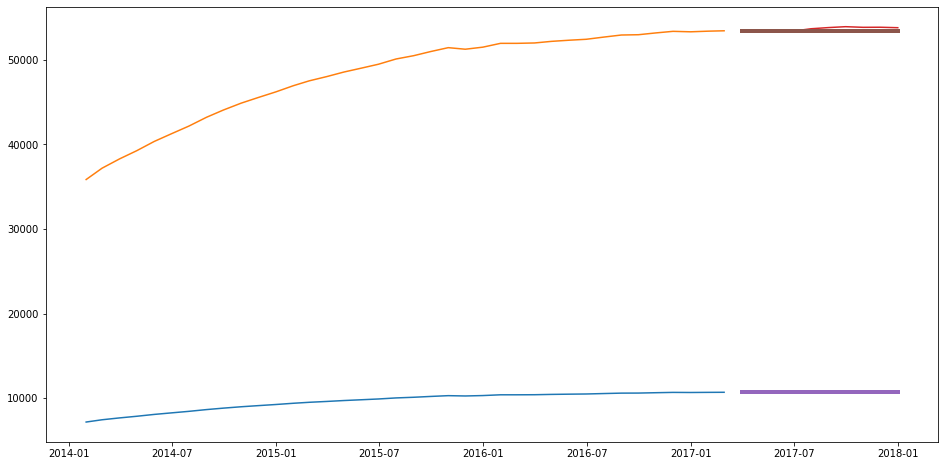

In [28]:
target_vars = ['Subscription_Type', 'Amount']

plot_and_eval(target_vars, train=train, test=test)

Subscription_Type -- MSE: 3743.50, RMSE: 61.18


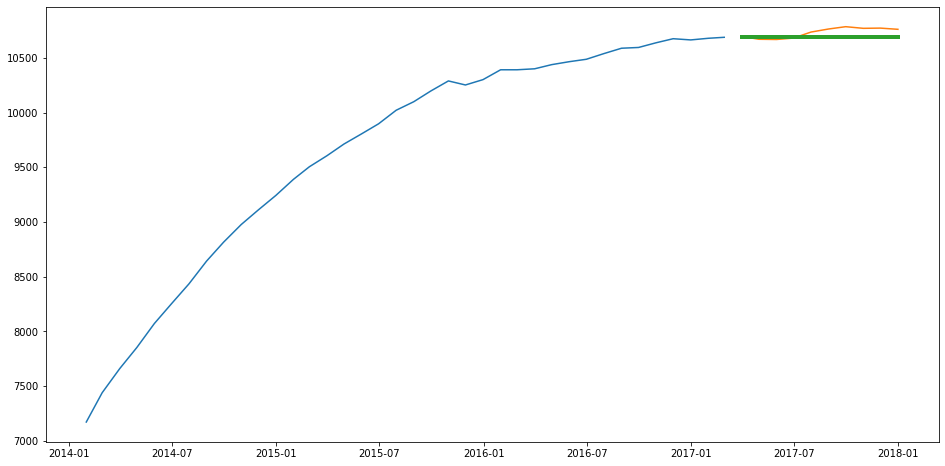

In [29]:
target_vars = ['Subscription_Type']

plot_and_eval(target_vars, train=train, test=test)

Evaluate using MSE and RMSE. Add evaluation metrics to `eval_df`

In [30]:
eval_df = append_eval_df(model_type = 'last_observed_value', train = train, test = test)
eval_df

,model_type,target_var,metric,value
0,last_observed_value,Subscription_Type,mse,3743.500000
1,last_observed_value,Subscription_Type,rmse,61.184148
2,last_observed_value,Amount,mse,93587.500000
3,last_observed_value,Amount,rmse,305.920741


### Simple Average

Take the simple average of historical values and use that value to predict future values. This is a good option for an initial baseline. Every future datapoint (those in 'test') will be assign the same value, the overall mean of the values in train.

In [31]:
train.Subscription_Type.mean()

9641.236842105263

In [32]:
train.Amount.mean()

48206.18421052631

In [33]:
yhat['Subscription_Type'] = train.Subscription_Type.mean()
yhat.Subscription_Type

Month_Invoiced
2017-03-31    9641.236842
2017-04-30    9641.236842
2017-05-31    9641.236842
2017-06-30    9641.236842
2017-07-31    9641.236842
2017-08-31    9641.236842
2017-09-30    9641.236842
2017-10-31    9641.236842
2017-11-30    9641.236842
2017-12-31    9641.236842
Freq: M, Name: Subscription_Type, dtype: float64

In [34]:
yhat['Amount'] = train.Amount.mean()
yhat.Amount

Month_Invoiced
2017-03-31    48206.184211
2017-04-30    48206.184211
2017-05-31    48206.184211
2017-06-30    48206.184211
2017-07-31    48206.184211
2017-08-31    48206.184211
2017-09-30    48206.184211
2017-10-31    48206.184211
2017-11-30    48206.184211
2017-12-31    48206.184211
Freq: M, Name: Amount, dtype: float64

Subscription_Type -- MSE: 1188012.77, RMSE: 1089.96
Amount -- MSE: 29700319.30, RMSE: 5449.80


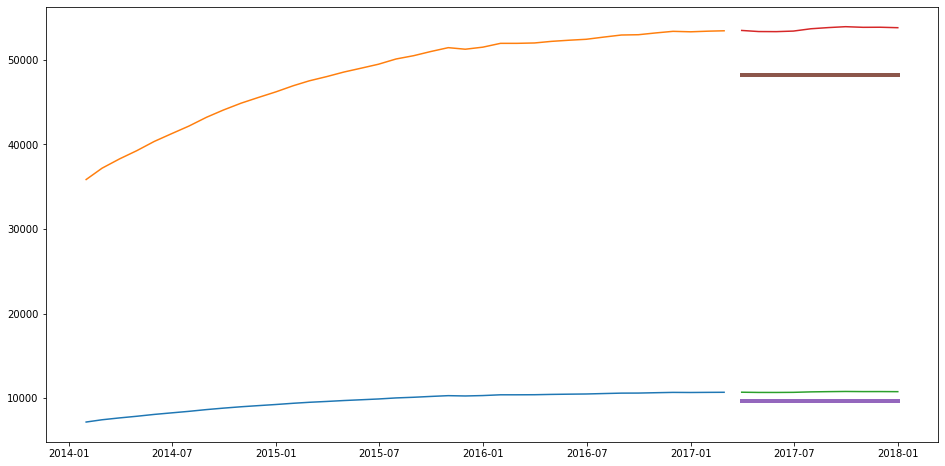

In [35]:
target_vars = ['Subscription_Type', 'Amount']
plot_and_eval(target_vars)

In [36]:
eval_df = append_eval_df(model_type = 'simple_average')
eval_df

,model_type,target_var,metric,value
0,last_observed_value,Subscription_Type,mse,3.743500e+03
1,last_observed_value,Subscription_Type,rmse,6.118415e+01
2,last_observed_value,Amount,mse,9.358750e+04
3,last_observed_value,Amount,rmse,3.059207e+02
4,simple_average,Subscription_Type,mse,1.188013e+06
5,simple_average,Subscription_Type,rmse,1.089960e+03
6,simple_average,Amount,mse,2.970032e+07
7,simple_average,Amount,rmse,5.449800e+03


### Moving Average

In [58]:
# 1 period = 1 month
periods = 3
train.Subscription_Type.rolling(periods).mean()

Month_Invoiced
2014-01-31             NaN
2014-02-28             NaN
2014-03-31     7422.333333
2014-04-30     7649.333333
2014-05-31     7860.333333
2014-06-30     8057.666667
2014-07-31     8252.000000
2014-08-31     8442.333333
2014-09-30     8630.333333
2014-10-31     8811.000000
2014-11-30     8966.666667
2014-12-31     9109.000000
2015-01-31     9246.666667
2015-02-28     9378.333333
2015-03-31     9499.333333
2015-04-30     9607.000000
2015-05-31     9707.333333
2015-06-30     9804.666667
2015-07-31     9907.666667
2015-08-31    10005.666667
2015-09-30    10105.666667
2015-10-31    10195.000000
2015-11-30    10246.000000
2015-12-31    10280.666667
2016-01-31    10314.666667
2016-02-29    10361.000000
2016-03-31    10394.000000
2016-04-30    10409.666667
2016-05-31    10434.333333
2016-06-30    10463.333333
2016-07-31    10497.000000
2016-08-31    10538.000000
2016-09-30    10574.000000
2016-10-31    10607.000000
2016-11-30    10636.000000
2016-12-31    10659.000000
2017-01-31   

In [59]:
len(train)

38

In [60]:
# Take the last 3 month average
train.Subscription_Type.rolling(periods).mean()[-1]

10677.0

In [61]:
train.Amount.rolling(periods).mean()

Month_Invoiced
2014-01-31             NaN
2014-02-28             NaN
2014-03-31    37111.666667
2014-04-30    38246.666667
2014-05-31    39301.666667
2014-06-30    40288.333333
2014-07-31    41260.000000
2014-08-31    42211.666667
2014-09-30    43151.666667
2014-10-31    44055.000000
2014-11-30    44833.333333
2014-12-31    45545.000000
2015-01-31    46233.333333
2015-02-28    46891.666667
2015-03-31    47496.666667
2015-04-30    48035.000000
2015-05-31    48536.666667
2015-06-30    49023.333333
2015-07-31    49538.333333
2015-08-31    50028.333333
2015-09-30    50528.333333
2015-10-31    50975.000000
2015-11-30    51230.000000
2015-12-31    51403.333333
2016-01-31    51573.333333
2016-02-29    51805.000000
2016-03-31    51970.000000
2016-04-30    52048.333333
2016-05-31    52171.666667
2016-06-30    52316.666667
2016-07-31    52485.000000
2016-08-31    52690.000000
2016-09-30    52870.000000
2016-10-31    53035.000000
2016-11-30    53180.000000
2016-12-31    53295.000000
2017-01-31   

In [62]:
train.Amount.rolling(periods).mean()[-1]

53385.0

In [63]:
yhat['Subscription_Type'] = train.Subscription_Type.rolling(periods).mean()[-1]
yhat.Subscription_Type

Month_Invoiced
2017-03-31    10677.0
2017-04-30    10677.0
2017-05-31    10677.0
2017-06-30    10677.0
2017-07-31    10677.0
2017-08-31    10677.0
2017-09-30    10677.0
2017-10-31    10677.0
2017-11-30    10677.0
2017-12-31    10677.0
Freq: M, Name: Subscription_Type, dtype: float64

In [64]:
yhat['Amount'] = train.Amount.rolling(periods).mean()[-1]
yhat.Amount

Month_Invoiced
2017-03-31    53385.0
2017-04-30    53385.0
2017-05-31    53385.0
2017-06-30    53385.0
2017-07-31    53385.0
2017-08-31    53385.0
2017-09-30    53385.0
2017-10-31    53385.0
2017-11-30    53385.0
2017-12-31    53385.0
Freq: M, Name: Amount, dtype: float64

Subscription_Type -- MSE: 4795.10, RMSE: 69.25
Amount -- MSE: 119877.50, RMSE: 346.23


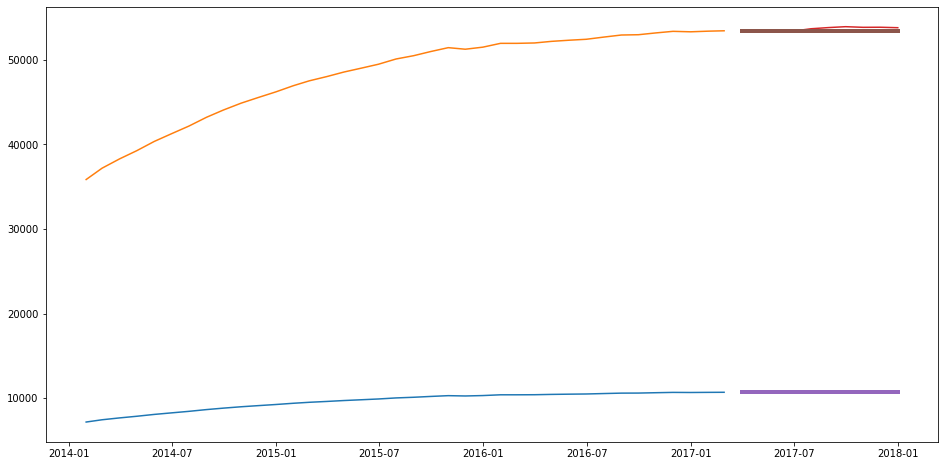

In [65]:
plot_and_eval(target_vars)

In [66]:
eval_df = append_eval_df('Moving Average, periods = 3')

Subscription_Type -- MSE: 4795.10, RMSE: 69.25


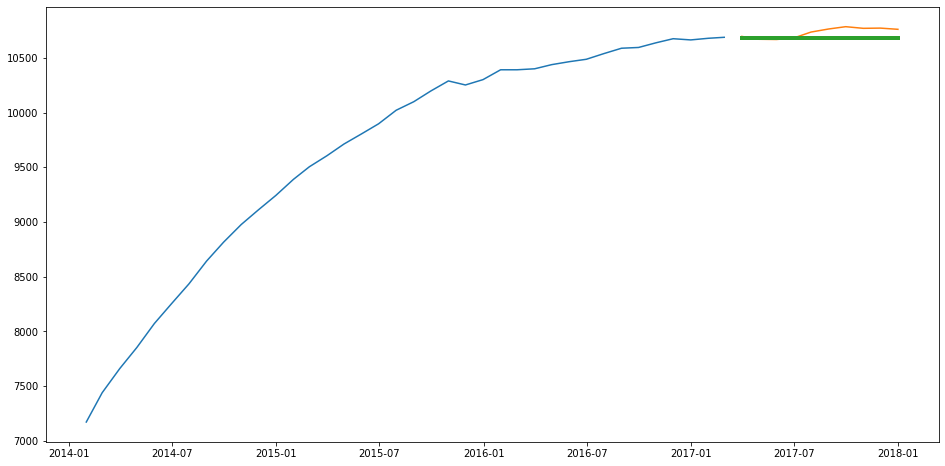

In [46]:
target_vars = ['Subscription_Type']

plot_and_eval(target_vars, train=train, test=test)


rolling average period: 1

Subscription Type

MSE: 3743.5
RMSE: 61.18414827387891

Amount

MSE: 93587.5
RMSE: 305.9207413693946

rolling average period: 3

Subscription Type

MSE: 4795.1
RMSE: 69.2466605693011

Amount

MSE: 119877.5
RMSE: 346.2333028465055

rolling average period: 6

Subscription Type

MSE: 7400.65
RMSE: 86.02703063572518

Amount

MSE: 185016.25
RMSE: 430.13515317862596

rolling average period: 12

Subscription Type

MSE: 27224.61111111092
RMSE: 164.9988215446126

Amount

MSE: 680615.2777777816
RMSE: 824.9941077230683


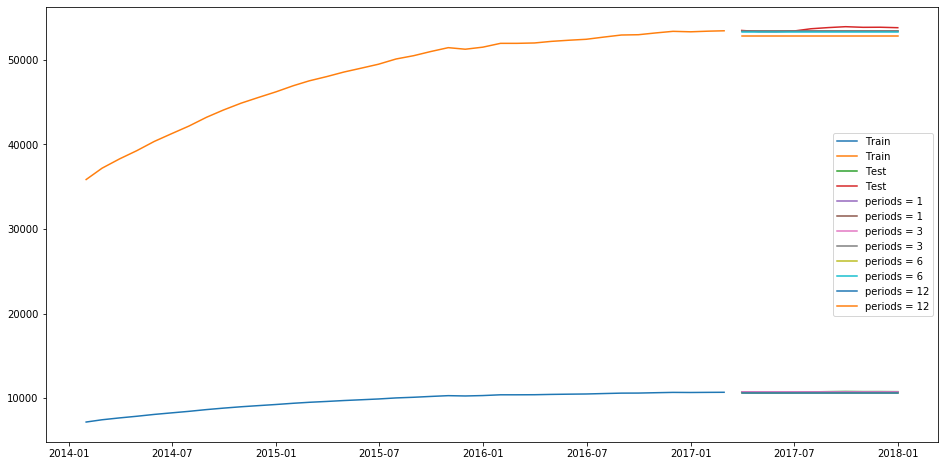

In [49]:
target_vars = ['Subscription_Type','Amount']

plt.figure(figsize = (16,8))
plt.plot(train[target_vars],label='Train')
plt.plot(test[target_vars],label ='Test')
period_vals = [1,3,6,12]
for p in period_vals:
    yhat['Subscription_Type'] = train.Subscription_Type.rolling(p).mean()[-1]
    yhat['Amount'] = train.Amount.rolling(p).mean()[-1]
    plt.plot(yhat.Subscription_Type, label = 'periods = {}'.format(p))
    plt.plot(yhat.Amount, label = 'periods = {}'.format(p))
    print('\nrolling average period:',p)
    print('\nSubscription Type\n')
    evaluate('Subscription_Type')
    print('\nAmount\n')
    evaluate('Amount')
plt.legend()

In [50]:
train.Subscription_Type[-1]

10688.0

In [51]:
train.Subscription_Type.rolling(1).mean()

Month_Invoiced
2014-01-31     7170.0
2014-02-28     7438.0
2014-03-31     7659.0
2014-04-30     7851.0
2014-05-31     8071.0
2014-06-30     8251.0
2014-07-31     8434.0
2014-08-31     8642.0
2014-09-30     8815.0
2014-10-31     8976.0
2014-11-30     9109.0
2014-12-31     9242.0
2015-01-31     9389.0
2015-02-28     9504.0
2015-03-31     9605.0
2015-04-30     9712.0
2015-05-31     9805.0
2015-06-30     9897.0
2015-07-31    10021.0
2015-08-31    10099.0
2015-09-30    10197.0
2015-10-31    10289.0
2015-11-30    10252.0
2015-12-31    10301.0
2016-01-31    10391.0
2016-02-29    10391.0
2016-03-31    10400.0
2016-04-30    10438.0
2016-05-31    10465.0
2016-06-30    10487.0
2016-07-31    10539.0
2016-08-31    10588.0
2016-09-30    10595.0
2016-10-31    10638.0
2016-11-30    10675.0
2016-12-31    10664.0
2017-01-31    10679.0
2017-02-28    10688.0
Freq: M, Name: Subscription_Type, dtype: float64

***INSIGHT*** Periods = 1 performed the best! This would be same as using the Last Observed Value

In [53]:
yhat['Subscription_Type'] = train.Subscription_Type.rolling(1).mean()[-1]
yhat['Amount'] = train.Amount.rolling(1).mean()[-1]
yhat

,Subscription_Type,Amount
Month_Invoiced,,
2017-03-31,10688.0,53440.0
2017-04-30,10688.0,53440.0
2017-05-31,10688.0,53440.0
2017-06-30,10688.0,53440.0
2017-07-31,10688.0,53440.0
2017-08-31,10688.0,53440.0
2017-09-30,10688.0,53440.0
2017-10-31,10688.0,53440.0
2017-11-30,10688.0,53440.0


Subscription_Type -- MSE: 3743.50, RMSE: 61.18
Amount -- MSE: 93587.50, RMSE: 305.92


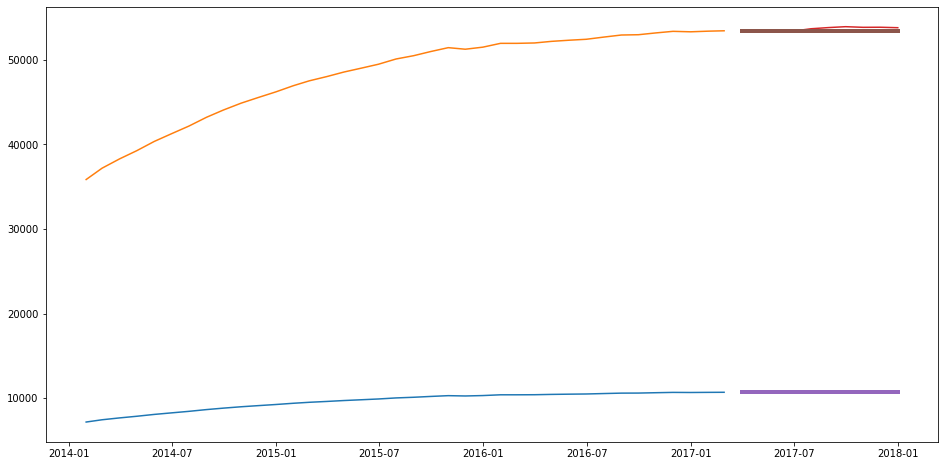

In [54]:
target_vars = ['Subscription_Type', 'Amount']
plot_and_eval(target_vars)

In [56]:
eval_df = append_eval_df('Moving Average, periods = 1')

In [67]:
eval_df

,model_type,target_var,metric,value
0,last_observed_value,Subscription_Type,mse,3.743500e+03
1,last_observed_value,Subscription_Type,rmse,6.118415e+01
2,last_observed_value,Amount,mse,9.358750e+04
3,last_observed_value,Amount,rmse,3.059207e+02
4,simple_average,Subscription_Type,mse,1.188013e+06
5,simple_average,Subscription_Type,rmse,1.089960e+03
6,simple_average,Amount,mse,2.970032e+07
7,simple_average,Amount,rmse,5.449800e+03
8,"Moving Average, periods = 1",Subscription_Type,mse,3.743500e+03
9,"Moving Average, periods = 1",Subscription_Type,rmse,6.118415e+01


### Holt's Linear Trend

Exponetial smoothing applied to both the average and the trend(slope)

In [68]:
target_vars

['Subscription_Type', 'Amount']

Subscription_Type 



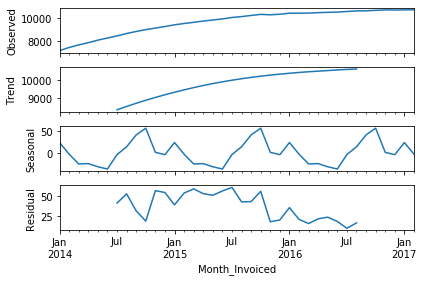

Amount 



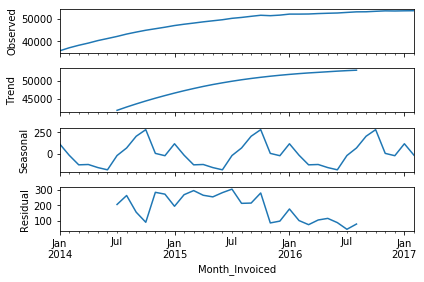

In [73]:
for var in target_vars:
    print(var,'\n')
    _ = sm.tsa.seasonal_decompose(train[var].resample('M').mean()).plot()
    plt.show()

Subscription_Type -- MSE: 74774.87, RMSE: 273.45
Amount -- MSE: 1869371.78, RMSE: 1367.25


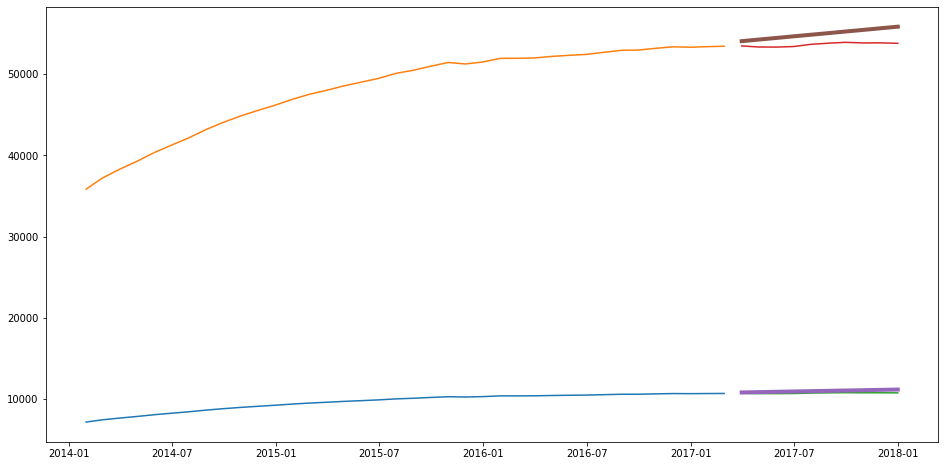

In [74]:
from statsmodels.tsa.api import Holt

model1 = Holt(train['Subscription_Type']).fit(smoothing_level = .3, smoothing_slope =.1, optimized = False)
model2 = Holt(train['Amount']).fit(smoothing_level = .3, smoothing_slope = .1, optimized = False)

yhat['Subscription_Type'] = pd.DataFrame(model1.forecast(test['Subscription_Type'].shape[0]),columns = ['Subscription_Type'])
yhat['Amount'] = pd.DataFrame(model2.forecast(test['Amount'].shape[0]), columns = ['Amount'])

plot_and_eval(target_vars, train, test)
eval_df = append_eval_df('holts_linear_trend')




In [75]:
eval_df

,model_type,target_var,metric,value
0,last_observed_value,Subscription_Type,mse,3.743500e+03
1,last_observed_value,Subscription_Type,rmse,6.118415e+01
2,last_observed_value,Amount,mse,9.358750e+04
3,last_observed_value,Amount,rmse,3.059207e+02
4,simple_average,Subscription_Type,mse,1.188013e+06
5,simple_average,Subscription_Type,rmse,1.089960e+03
6,simple_average,Amount,mse,2.970032e+07
7,simple_average,Amount,rmse,5.449800e+03
8,"Moving Average, periods = 1",Subscription_Type,mse,3.743500e+03
9,"Moving Average, periods = 1",Subscription_Type,rmse,6.118415e+01


In [78]:
eval_df[eval_df.metric == 'rmse'].value.min()

61.18414827387891